In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from collections import Counter
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Documents\\File\\lv.csv")

In [3]:
df.shape

(582, 11)

In [4]:
df.columns=['Age','Gender','TB','DB','Alkphos','Sgpt','Sgot','TP','ALB','A/G Ratio' ,'Selector field']

In [6]:
df.head(5)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector field
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [7]:
import math
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (int(row1[i]) - int(row2[i]))**2
        return np.sqrt(distance)

In [49]:
X = df.to_numpy()
X = X[:,2:11]

In [51]:
Y = df.to_numpy()
Y = Y[:,10]

In [52]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)


In [53]:
accuracy = []
K = np.arange(1,100) 

In [54]:
for k in K:   
    prediction = []   
    coorect_count = 0  
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            dist = euclidean_distance(X_test[i], X_train[j])
            distances.append((X_train[j], dist, y_train[j]))  
        distances.sort(key=lambda x: x[1])
        neighbors = distances[:k] 
        class_counter = Counter()  
        for neighbor in neighbors:
            class_counter[neighbor[2]] += 1
        prediction.append(class_counter.most_common(1)[0][0])
        if(y_test[i] == prediction[i]):
            coorect_count = coorect_count + 1
    acc = coorect_count/float(len(X_test))  ## accuracy
    accuracy.append(acc)

In [55]:
max(accuracy)

0.7435897435897436

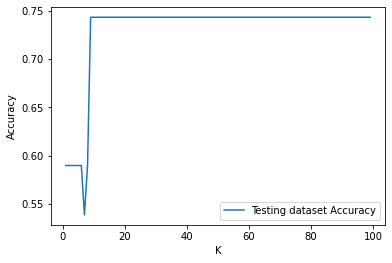

In [56]:
plt.plot(K, accuracy, label = 'Testing dataset Accuracy')
plt.legend() 
plt.xlabel('K') 
plt.ylabel('Accuracy') 
plt.show()